## **About dataset**
This data set was gathered using a Google forms survey of university students in order to analyse their present academic position and mental health.


# **Problem**
Universities are worried about their students' academic achievement as well as their mental health, particularly if they are depressed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


### **1| Understanding of data**

1.1 Column names

1.2 Dataset shape

1.3 Dataset head and tail

1.4 Dataset dtypes

1.5 Dataset describe

1.6 Dataset renaming columns

In [3]:
# 1.1  Column names
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

# column description
Choose your gender- student's gender — male or female

Age- Age of student

What is your course? - course in which students are enrolled

Your current year of Study - which year student is in their course

What is your CGPA?- cgpa of student

Marital status- student is married or not

Do you have Anxiety? - student have anxiety - yes or no

Do you have Panic attack? - student have panic attact - yes or no

Did you seek any specialist for a treatment?-student taking any treatment -yes or no

In [4]:
# checking shape
df.shape

(101, 11)

In [5]:
# dataset head
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [6]:
# dataset tail
df.tail()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
100,18/07/2020 20:16:21,Male,20.0,Biomedical science,Year 2,3.00 - 3.49,No,No,No,No,No


In [7]:
# dataset datatypes
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [8]:
# dataset describe
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [9]:
# changing name of columns(easy to understand)
df.rename(columns = {
    "Choose your gender" : "Gender",
    "What is your course?": "Course",
    "Your current year of Study": "Year",
    "What is your CGPA?": "CGPA",
    "Marital status": "MS",
    "Do you have Depression?": "Depression",
    "Do you have Anxiety?": "Anxiety",
    "Do you have Panic attack?": "Panic",
    "Did you seek any specialist for a treatment?": "Specialist",
}, inplace = True)

df.head()

,Timestamp,Gender,Age,Course,Year,CGPA,MS,Depression,Anxiety,Panic,Specialist
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [10]:
# checking null values
df.isna().sum()

Timestamp     0
Gender        0
Age           1
Course        0
Year          0
CGPA          0
MS            0
Depression    0
Anxiety       0
Panic         0
Specialist    0
dtype: int64

### Only age column has one null value

In [11]:
# Checking duplicates
df.duplicated().sum()

0

### No duplicates values present

## Data Cleaning

In [12]:
df.sample()


,Timestamp,Gender,Age,Course,Year,CGPA,MS,Depression,Anxiety,Panic,Specialist
93,13/07/2020 16:15:13,Female,18.0,BENL,year 1,3.00 - 3.49,No,Yes,No,No,No


In [13]:
# Dropping timestamp column

df.drop(['Timestamp'], axis=1, inplace=True)
df.head()

,Gender,Age,Course,Year,CGPA,MS,Depression,Anxiety,Panic,Specialist
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [14]:
# checking shape
df.shape

(101, 10)

In [15]:
# Filling null values of Age column with mean and changes its data type to Integer

mean_age  = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)
df.isna().sum()

Gender        0
Age           0
Course        0
Year          0
CGPA          0
MS            0
Depression    0
Anxiety       0
Panic         0
Specialist    0
dtype: int64

In [16]:
df["Age"] = df["Age"].astype(int)

In [17]:
df['CGPA']=pd.to_numeric(df['CGPA'], errors='coerce').fillna(0).astype(float)
df.dtypes

Gender         object
Age             int64
Course         object
Year           object
CGPA          float64
MS             object
Depression     object
Anxiety        object
Panic          object
Specialist     object
dtype: object

## Checking unique values of different columns

In [18]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
df['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [20]:
df['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [21]:
df['Year'].replace('Year 1','year 1',inplace=True)
df['Year'].replace('Year 2','year 2',inplace=True)
df['Year'].replace('Year 3','year 3',inplace=True)
df['Year'].unique()

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

In [22]:
df['MS'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
df['Anxiety'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df['Panic'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df['Specialist'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df.dtypes

Gender         object
Age             int64
Course         object
Year           object
CGPA          float64
MS             object
Depression     object
Anxiety        object
Panic          object
Specialist     object
dtype: object

## *Visualization*

<Axes: xlabel='Gender', ylabel='count'>

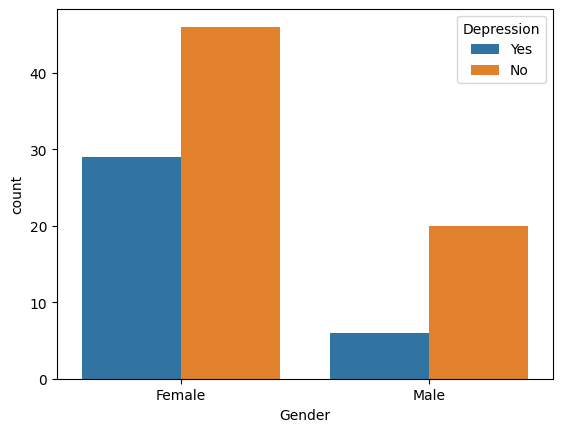

In [27]:
sns.countplot(x= "Gender",hue="Depression",data=df)


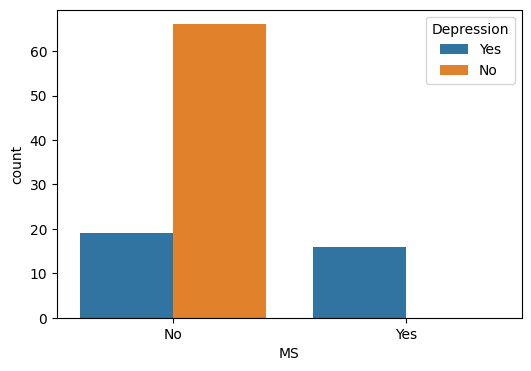

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x="MS",hue="Depression",data=df)
plt.show()

<Axes: xlabel='Year', ylabel='count'>

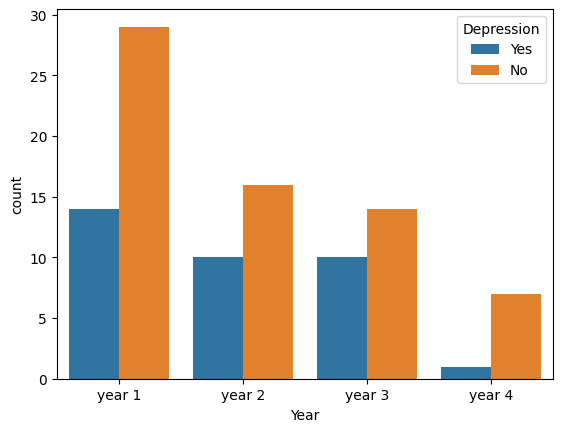

In [29]:
sns.countplot(x= 'Year', hue='Depression',data=df)

<Axes: xlabel='CGPA', ylabel='count'>

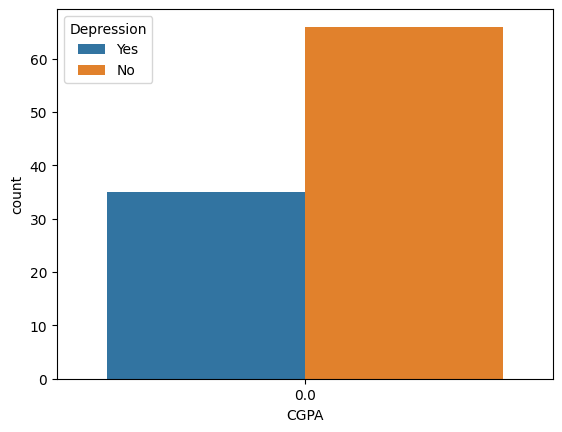

In [30]:
sns.countplot(x= 'CGPA', hue='Depression',data=df)

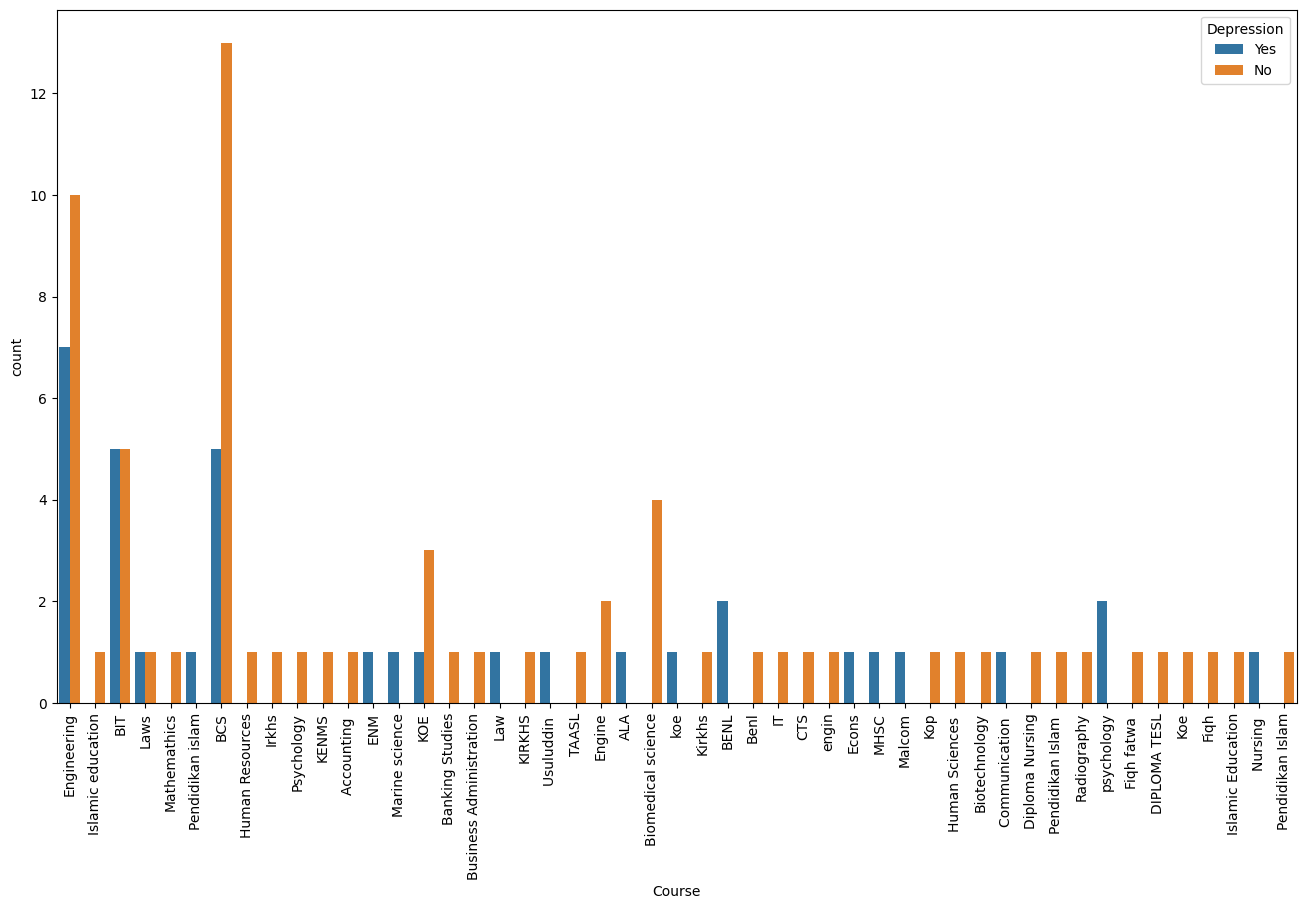

In [31]:
plt.subplots(figsize=(16,9))
sns.countplot(x="Course", hue='Depression',data=df)
plt.xticks(rotation=90)
plt.show()


converting datatype to numerical with the help of get_dummies(One-hot encoding)

In [32]:
df = pd.get_dummies(df, columns=["Gender"], prefix='Gender', drop_first = True)
df = pd.get_dummies(df, columns=["Year"], prefix='Year', drop_first = True)
df = pd.get_dummies(df, columns=["Course"], prefix='Course', drop_first = True)
df = pd.get_dummies(df, columns=["CGPA"], prefix='CGPA', drop_first = True)
df= pd.get_dummies(df, columns=["MS"], prefix='MS', drop_first = True)
df = pd.get_dummies(df, columns=["Anxiety"], prefix='Anxiety', drop_first = True)
df = pd.get_dummies(df, columns=["Panic"], prefix='Panic', drop_first = True)
df = pd.get_dummies(df, columns=["Specialist"], prefix='Specialist', drop_first = True)
df.head()

,Age,Depression,Gender_Male,Year_year 2,Year_year 3,Year_year 4,Course_Accounting,Course_BCS,Course_BENL,Course_BIT,...,Course_Radiography,Course_TAASL,Course_Usuluddin,Course_engin,Course_koe,Course_psychology,MS_Yes,Anxiety_Yes,Panic_Yes,Specialist_Yes
0,18,Yes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,21,No,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,19,Yes,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,22,Yes,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,23,No,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## ML modelling

In [34]:
# Standardize feature age
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [35]:
X = df.drop(columns=['Depression'], axis=1)
y = df['Depression']

In [36]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [37]:
RandomForest_model= RandomForestClassifier()
RandomForest_model.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
# Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Decision Trees
decision_tree = DecisionTreeClassifier()  # You can adjust the maximum depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement Random Forest
random_forest = RandomForestClassifier(n_estimators=100)  # You can adjust the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [41]:
# Evaluate the models
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))

K-Nearest Neighbors (KNN) Accuracy: 0.6451612903225806
Decision Tree Accuracy: 0.7096774193548387
Random Forest Accuracy: 0.7741935483870968


In [42]:
# also, we can print more evaluation metrics like precision, recall, and F1-score
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))


Classification Report for KNN:
              precision    recall  f1-score   support

          No       0.66      0.95      0.78        20
         Yes       0.50      0.09      0.15        11

    accuracy                           0.65        31
   macro avg       0.58      0.52      0.46        31
weighted avg       0.60      0.65      0.55        31



In [43]:
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_decision_tree))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

          No       0.74      0.85      0.79        20
         Yes       0.62      0.45      0.53        11

    accuracy                           0.71        31
   macro avg       0.68      0.65      0.66        31
weighted avg       0.70      0.71      0.70        31



In [44]:
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_random_forest))


Classification Report for Random Forest:
              precision    recall  f1-score   support

          No       0.76      0.95      0.84        20
         Yes       0.83      0.45      0.59        11

    accuracy                           0.77        31
   macro avg       0.80      0.70      0.72        31
weighted avg       0.79      0.77      0.75        31




Random forest classifier is performing best among other macine learning models.